In [2]:
# import json files

import os, json
import pandas as pd

path = './video/'
json_files = [json for json in os.listdir(path) if json.endswith('.jsonl')]


In [409]:
json_data = []
# read each file
for js in json_files:
    with open(os.path.join(path, js)) as json_file:
        lines = json_file.readlines()
        for line in lines:
            dict_line = json.loads(line)
            # only add to the DataFrame if it has the VOCALOID tag
            if 'VOCALOID' in dict_line["tags"]:
                json_data.append(dict_line)

df = pd.DataFrame.from_dict(json_data)

df

,video_id,watch_num,comment_num,mylist_num,title,description,category,tags,upload_time,file_type,length,size_high,size_low
0,sm1038650,6502,59,60,テレポーテーション－恋の未確認－ボーカロイドとmix,sm1021218 (VOCALOID2 MIKU ver)とsm1021296 原曲とを勝...,anime,VOCALOID VOCALOID2 アニメ ウシオオネエサン オッサンホイホイ 初音ミク 橋本潮,2007-09-11T18:02:46+09:00,flv,62,2355098,2333208
1,sm1083650,7086,156,15,初音ミクの間違った使用方法２・夏の思い出,やっぱ、虫の音もダメダメ。 mylist/1049849/2448478 ◆9/18記：し...,None,VOCALOID 『CTRL+N』推奨 コイツチョットダケウG ポンコツ歌姫 初音セミ 初音...,2007-09-18T00:41:49+09:00,flv,40,1489849,1460399
2,sm1243650,1256,97,7,初音ミクが古城の門を通りますよver0.1,練習がてら初投稿<br />使用ソフト：初音ミク体験版、Domino 1.24、TiMidi...,None,VOCALOID VOCALOID校歌シリーズ 上田 上田高 再生数ガ急ニ伸ビル動画 初音ミ...,2007-10-10T00:48:53+09:00,flv,45,709529,563865
3,sm1333650,3461,109,12,みくまうた(2) 『ググっても仕方ない』 唄：熊音ミクス,ＰＣソフト「初音ミク」より。レッツゴォ吉から一言「昨日の敵は今日の友って古い言葉があるけど、...,entertainment,VOCALOID エンターテイメント クマウタ ミクハ末期シリーズ ミクマウタ 仕事ヲ選ベナ...,2007-10-21T21:41:52+09:00,flv,94,2827861,2289888
4,sm1458650,1678,43,15,ラムネ「ラムネ色のメロディ」を初音ミクが頑張ってみた,■前作sm1453197の修正版です。全パラメータをリセットして一から作り直しました。これで...,None,VOCALOID ネコネコソフト ラムネ 初音ミク 歌ワセテミタ,2007-11-05T20:42:46+09:00,flv,90,3493129,3410404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671941,sm39286133,79,3,3,【GUMI×巡音ルカ】音楽って楽しい【ツインボーカル】【オリジナル曲】,<strong>ツインボーカル</strong>をやってみたくて、GUMIと巡音ルカでやって...,music_sound,GUMI GUMIオリジナル曲 VOCALOID新曲リンク ボカロオリジナル曲 ルカ&AMP...,2021-09-04T16:58:02+09:00,mp4,277,1,1
671942,sm39316133,282,11,6,魔女とカンテラ / 巡音ルカ,夜の静寂に、熱と光を。,music_sound,VOCALOID VOCALOIDオリジナル曲 オ洒落ナルカウタ ルカオリジナル曲 夜ノウタ...,2021-09-11T23:01:02+09:00,mp4,232,1,1
671943,sm39321133,40,8,0,【トークロイド】星に願いを#5【ラジオ】,お手紙ぼしゅう→lm1grandprix@gmail.com,entertainment,VOCALOID トークロイド ボカロラジオ 蒼姫ラピス,2021-09-11T23:59:02+09:00,mp4,670,1,1
671944,sm39382133,1788,95,22,【Tda Teto &amp; Luka Lace Dress】Promise,だんしゃくいも様、盗賊@つばきP様、Aih kob様<br>Cream pie様、大黒屋様、...,entertainment,MMD PROMISE(SAMFREE) SAMFREE SAMメモリーズ TDA式改変ルカ...,2021-09-24T17:53:02+09:00,mp4,263,1,1


In [423]:
# create a new column extracting only the year and month of the upload date
df["month"] = [x[:7] for x in df["upload_time"]]
df["month"] = pd.to_datetime(df["month"]).dt.to_period('M')

# discard unnecessary columns for this project
filtered_df = df[["watch_num", "comment_num", "mylist_num", "length", "month"]]

filtered_df.head()


,watch_num,comment_num,mylist_num,length,month
0,6502,59,60,62,2007-09
1,7086,156,15,40,2007-09
2,1256,97,7,45,2007-10
3,3461,109,12,94,2007-10
4,1678,43,15,90,2007-11


In [431]:
##### extract the videos with more than 100,000 views
pop_df = filtered_df[filtered_df["watch_num"]>100000]

# describe the numerical values of the whole table
filtered_df.describe()["length"].round(2)

count    671946.00
mean        266.54
std         355.60
min           1.00
25%         182.00
50%         228.00
75%         273.00
max       34190.00
Name: length, dtype: float64

In [442]:
# describe the numerical values of the extracted table
pop_df.describe()["length"].round(2)


count     8538.00
mean       288.74
std        687.03
min          7.00
25%        201.00
50%        235.00
75%        272.00
max      34190.00
Name: length, dtype: float64

In [447]:
# each month on average only has 47 entries, so congregate to year instead
pop_df["year"] = pop_df["month"].dt.year
pop_df = pop_df[["watch_num", "comment_num", "mylist_num", "length", "year"]]
pop_df.sort_values(by="year")


pop_df.head()

/tmp/ipykernel_3117/3595765568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df["year"] = pop_df["month"].dt.year


,watch_num,comment_num,mylist_num,length,year
6,118385,10543,3299,113,2007
13,298159,14309,8842,242,2008
23,206428,3253,1993,120,2008
35,356495,11863,11336,202,2008
38,665440,31733,12262,201,2008


In [448]:
lengths = filtered_df.groupby("month").median()["length"]
pop_lengths = pop_df.groupby("year").median()["length"]

filtered_lengths = lengths.drop(labels=["2007-03", "2007-04", "2007-05", "2007-06", "2007-07", "2007-08", "2021-09"])

print (filtered_lengths)
print (pop_lengths)

month
2007-09    144.0
2007-10    154.0
2007-11    178.0
2007-12    182.0
2008-01    188.0
           ...  
2021-04    210.0
2021-05    210.0
2021-06    211.0
2021-07    211.0
2021-08    208.0
Freq: M, Name: length, Length: 168, dtype: float64
year
2007    219.0
2008    244.0
2009    244.0
2010    246.0
2011    237.0
2012    236.0
2013    236.0
2014    238.0
2015    234.0
2016    229.0
2017    228.5
2018    230.0
2019    219.5
2020    207.0
2021    206.0
Name: length, dtype: float64


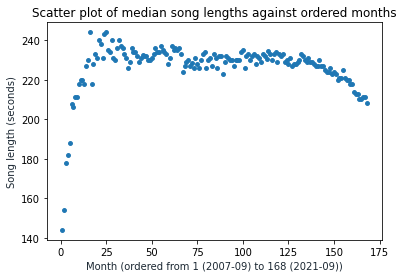

[0.01485807]
225.59270744225833
0.003260692017708511


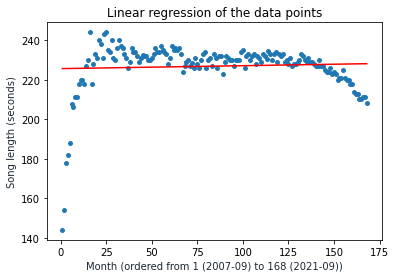

[228.29687603 228.3117341 ]
[-0.00366937  0.63498151]
208.0225433384522
0.3774002806095138


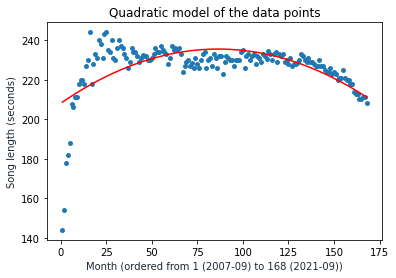

[202.04498378 201.34064543]
[ 4.01640387e-05 -1.38509533e-02  1.32530092e+00]
198.1565886377445
0.4587058061003386


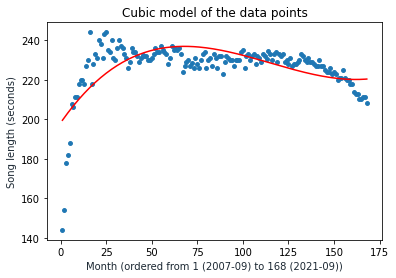

[222.69401892 222.97687248]
[-1.78496702e-06  6.43482891e-04 -7.95277947e-02  3.80899226e+00]
176.60931439544083
0.7463114716483401


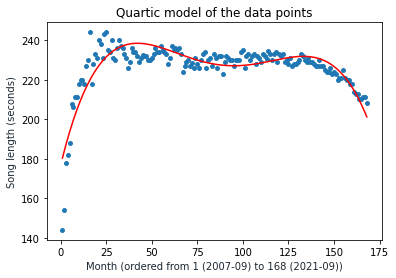

[156.38289912 152.06118036]


In [440]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
import scipy
import seaborn as sns


plt.scatter(lst, filtered_lengths, s=15)
plt.title('Scatter plot of median song lengths against ordered months')
plt.xlabel('Month (ordered from 1 (2007-09) to 168 (2021-09))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.show()



lst = np.array(list(range(1,169)))
x = lst.reshape(-1,1)
# find linear line
reg = linear_model.LinearRegression()
reg.fit(x, filtered_lengths)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(x, filtered_lengths)) # this is R^2

y = reg.coef_ * x + reg.intercept_

plt.scatter(lst, filtered_lengths, s=15)
plt.title('Linear regression of the data points')
plt.xlabel('Month (ordered from 1 (2007-09) to 168 (2021-09))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.plot(lst, y, '-r', label='Linear regression line')
plt.show()

# 2022-10, 2022-11
print(reg.predict([[182], [183]]))

reg = linear_model.LinearRegression()
lst2 = lst ** 2
X2 = np.array([lst2, lst]).transpose()
reg.fit(X2, filtered_lengths)


print(reg.coef_)
print(reg.intercept_)
print(reg.score(X2, filtered_lengths)) # this is R^2

y = np.matmul(X2, reg.coef_) + reg.intercept_

plt.scatter(lst, filtered_lengths, s=15)
plt.title('Quadratic model of the data points')
plt.xlabel('Month (ordered from 1 (2007-09) to 168 (2021-09))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.plot(lst, y, '-r', label='Linear regression line')
plt.show()

print(reg.predict([[33124, 182],[33489, 183]]))

reg = linear_model.LinearRegression()
lst3 = lst ** 3
X3 = np.array([lst3, lst2, lst]).transpose()
reg.fit(X3, filtered_lengths)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X3, filtered_lengths)) # this is R^2

y = np.matmul(X3, reg.coef_) + reg.intercept_

plt.scatter(lst, filtered_lengths, s=15)
plt.title('Cubic model of the data points')
plt.xlabel('Month (ordered from 1 (2007-09) to 168 (2021-09))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.plot(lst, y, '-r', label='Linear regression line')
plt.show()

print(reg.predict([[6028568, 33124, 182],[6128487, 33489, 183]]))

reg = linear_model.LinearRegression()
lst4 = lst ** 4
X4 = np.array([lst4, lst3, lst2, lst]).transpose()
reg.fit(X4, filtered_lengths)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X4, filtered_lengths)) # this is R^2

y = np.matmul(X4, reg.coef_) + reg.intercept_

plt.scatter(lst, filtered_lengths, s=15)
plt.title('Quartic model of the data points')
plt.xlabel('Month (ordered from 1 (2007-09) to 168 (2021-09))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.plot(lst, y, '-r', label='Linear regression line')
plt.show()

print(reg.predict([[1097199376, 6028568, 33124, 182],[1121513121, 6128487, 33489, 183]]))


In [294]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

reg = linear_model.LinearRegression()
scores = cross_val_score(reg, x, filtered_lengths, scoring='r2', cv=folds)
scores2 = cross_val_score(reg, X2, filtered_lengths, scoring='r2', cv=folds)
scores3 = cross_val_score(reg, X3, filtered_lengths, scoring='r2', cv=folds)
scores4 = cross_val_score(reg, X4, filtered_lengths, scoring='r2', cv=folds)

print (scores)
print (scores2)
print (scores3)
print (scores4)

print (scores.mean(), scores2.mean(), scores3.mean(), scores4.mean())


[-0.01374662 -0.23002038 -0.06402345 -0.07485037  0.00191025]
[ 0.37368215 -0.41867047  0.36834027  0.31442615  0.34974564]
[ 0.43390701 -0.28114687  0.48091588  0.44263621  0.28789936]
[0.72234192 0.42800837 0.75189053 0.79317775 0.68668748]
-0.07614611418646319 0.1975047472961038 0.27284231749412735 0.6764212085514651


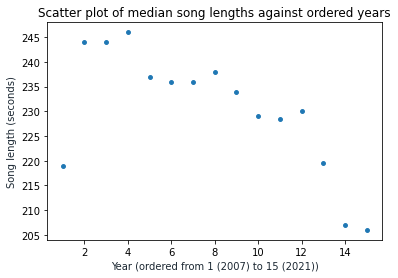

[-1.93214286]
245.72380952380954
0.4778610939979665


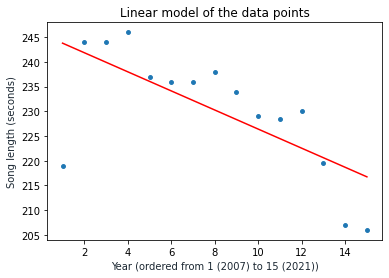

[214.80952381]
[-0.40982547  4.62506464]
227.14505494505497
0.7946150944227748


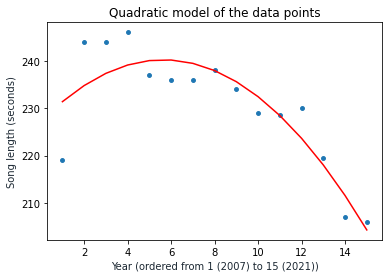

[196.23076923]
[ 0.02172365 -0.93119299  8.07043501]
221.8271062271062
0.8069733709338637


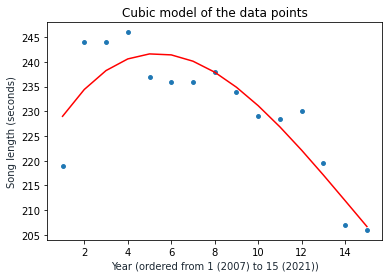

[201.54871795]


In [444]:
pop_lst = np.array(list(range(1,16)))



plt.scatter(pop_lst, pop_lengths, s=15)
plt.title('Scatter plot of median song lengths against ordered years')
plt.xlabel('Year (ordered from 1 (2007) to 15 (2021))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.show()



x = pop_lst.reshape(-1,1)
# find linear line
reg = linear_model.LinearRegression()
reg.fit(x, pop_lengths)


print(reg.coef_)
print(reg.intercept_)
print(reg.score(x, pop_lengths)) # this is R^2

y = reg.coef_ * x + reg.intercept_


plt.plot(pop_lst, y, '-r', label='Linear regression line')
plt.scatter(pop_lst, pop_lengths, s=15)
plt.title('Linear model of the data points')
plt.xlabel('Year (ordered from 1 (2007) to 15 (2021))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.show()


#2022
print(reg.predict([[16]]))

reg = linear_model.LinearRegression()
pop_lst2 = pop_lst ** 2
X2 = np.array([pop_lst2, pop_lst]).transpose()
reg.fit(X2, pop_lengths)


print(reg.coef_)
print(reg.intercept_)
print(reg.score(X2, pop_lengths)) # this is R^2

y = np.matmul(X2, reg.coef_) + reg.intercept_


plt.plot(pop_lst, y, '-r')
plt.scatter(pop_lst, pop_lengths, s=15)
plt.title('Quadratic model of the data points')
plt.xlabel('Year (ordered from 1 (2007) to 15 (2021))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.show()

print(reg.predict([[256, 16]]))

reg = linear_model.LinearRegression()
pop_lst3 = pop_lst ** 3
X3 = np.array([pop_lst3, pop_lst2, pop_lst]).transpose()
reg.fit(X3, pop_lengths)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X3, pop_lengths)) # this is R^2

y = np.matmul(X3, reg.coef_) + reg.intercept_


plt.plot(pop_lst, y, '-r')
plt.scatter(pop_lst, pop_lengths, s=15)
plt.title('Cubic model of the data points')
plt.xlabel('Year (ordered from 1 (2007) to 15 (2021))', color='#1C2833')
plt.ylabel('Song length (seconds)', color='#1C2833')
plt.show()



print(reg.predict([[4096, 256, 16]]))

In [296]:
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)


reg = linear_model.LinearRegression()
scores = cross_val_score(reg, x, pop_lengths, scoring='r2', cv=folds)
scores2 = cross_val_score(reg, X2, pop_lengths, scoring='r2', cv=folds)
scores3 = cross_val_score(reg, X3, pop_lengths, scoring='r2', cv=folds)

print (scores)
print (scores2)
print (scores3)


print (scores.mean(), scores2.mean(), scores3.mean())

[ 0.62453513 -0.08714126]
[0.52408398 0.3407961 ]
[ 0.57587999 -0.05876148]
0.2686969351763874 0.43244004226082927 0.2585592571287604


In [302]:
X = filtered_df[["comment_num", "mylist_num"]]
y = filtered_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X, y)) # this is R^2



X = filtered_df[["comment_num", "mylist_num", "length"]]
y = filtered_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X, y)) # this is R^2

[ 0.32938257 47.79165665]
429.41204034856673
0.8340757822425953
[ 0.32942462 47.79195152 -0.35902197]
525.0449641126033
0.8340771385602392


In [518]:
X = pop_df[["comment_num"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2



X = pop_df[["mylist_num"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2



X = pop_df[["length"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2


X = pop_df[["comment_num", "mylist_num"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2



X = pop_df[["mylist_num", "length"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2


X = pop_df[["comment_num", "length"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2



X = pop_df[["comment_num", "mylist_num", "length"]]
y = pop_df["watch_num"]
reg = linear_model.LinearRegression()
reg.fit(X, y)


print(reg.score(X, y)) # this is R^2

0.045698402093379165
0.7868920869563316
2.571173243071101e-05
0.7911748014842788
0.7869550298782888
0.04575899042630038
0.7912512010120106


count    48612.000000
mean       204.273595
std         68.024745
min          1.000000
25%        169.000000
50%        209.000000
75%        248.000000
max        419.000000
Name: length, dtype: float64


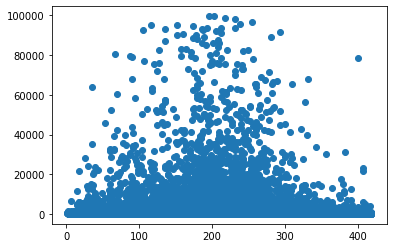

In [522]:
x = filtered_df[filtered_df["length"]<420]
x = x[x["watch_num"]<=100000]
x = x[x["month"]>"2020-12"]["length"]

y = filtered_df[filtered_df["length"]<420]
y = y[y["watch_num"]<=100000]
y = y[y["month"]>"2020-12"]["watch_num"]

print (x.describe())
plt.scatter(x, y)
plt.show()

count    8184.000000
mean      229.052419
std        62.701024
min         7.000000
25%       200.000000
50%       232.000000
75%       267.000000
max       419.000000
Name: length, dtype: float64


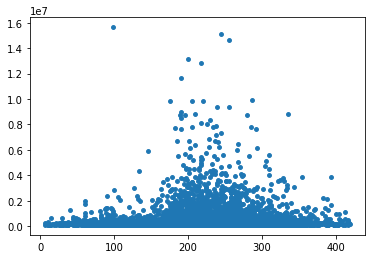

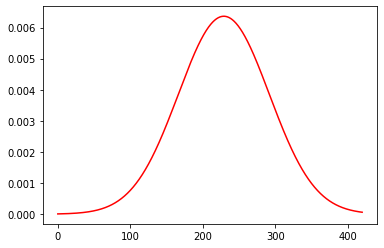

In [521]:
from scipy.stats import norm

x = pop_df[pop_df["length"]<420]["length"]
y = pop_df[pop_df["length"]<420]["watch_num"]

print (x.describe())
plt.scatter(x, y, s=15)

plt.show()

x_axis = np.arange(0,420,.1)
plt.plot(x_axis, norm.pdf(x_axis, x.mean(), x.std()), '-r')
plt.show()

count    140.000000
mean     201.521429
std       50.529067
min       46.000000
25%      172.000000
50%      205.000000
75%      232.250000
max      342.000000
Name: length, dtype: float64


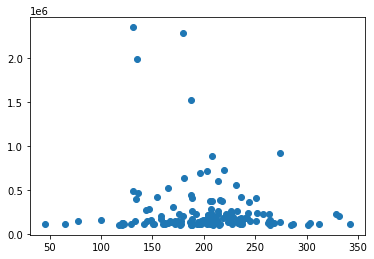

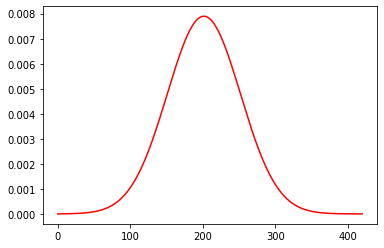

In [397]:
x = pop_df[pop_df["length"]<420]
x = x[x["year"]==2021]["length"]
y = pop_df[pop_df["length"]<420]
y = y[y["year"]==2021]["watch_num"]


print (x.describe())
plt.scatter(x, y)

plt.show()

x_axis = np.arange(0,420,.1)
plt.plot(x_axis, norm.pdf(x_axis, x.mean(), x.std()), '-r')
plt.show()

In [515]:
cormat = filtered_df.corr().abs()
round(cormat,5)

,watch_num,mylist_num,length
watch_num,1.00000,0.91144,0.00460
mylist_num,0.91144,1.00000,0.00592
length,0.00460,0.00592,1.00000


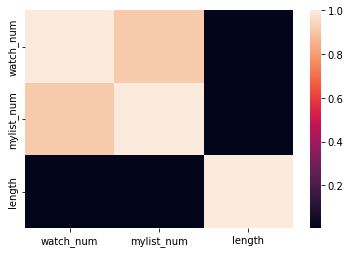

In [516]:
sns.heatmap(cormat);

In [501]:
cormat = pop_df.corr().abs()
round(cormat,5)

,watch_num,mylist_num,length,year
watch_num,1.00000,0.88707,0.00507,0.00214
mylist_num,0.88707,1.00000,0.00323,0.16102
length,0.00507,0.00323,1.00000,0.05029
year,0.00214,0.16102,0.05029,1.00000


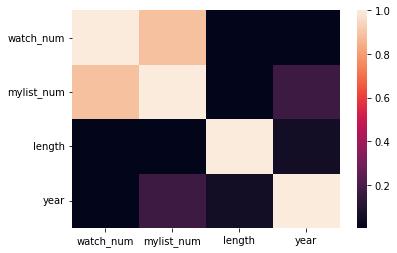

In [502]:
sns.heatmap(cormat);

            watch_num  mylist_num   length
watch_num     1.00000     0.91258  0.00535
mylist_num    0.91258     1.00000  0.00679
length        0.00535     0.00679  1.00000


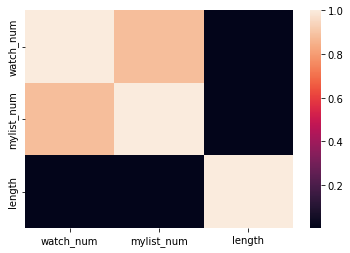

In [512]:
cormat = filtered_df[filtered_df["month"]>"2019-12"].corr().abs()
#cm = cormat.drop("month")
#cm = cm.drop(columns="month")
print (round(cormat,5))

sns.heatmap(cm);

            watch_num  mylist_num   length
watch_num     1.00000     0.88347  0.03400
mylist_num    0.88347     1.00000  0.01025
length        0.03400     0.01025  1.00000


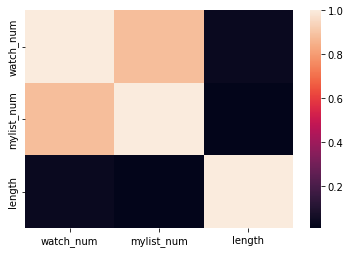

In [520]:
cormat = pop_df[pop_df["year"]>2019].corr().abs()
cm = cormat.drop("year")
cm = cm.drop(columns="year")
print (round(cm,5))

sns.heatmap(cm);

In [523]:
class_df = df[["video_id", "watch_num", "category", "tags", "length", "month"]]


class_df = class_df[class_df["month"]>"2020-12"]
class_df["pop"] = np.where(class_df["watch_num"]>100000, True, False)
class_df = class_df[["pop", "length"]]


class_df.head()


,pop,length
614,False,242
615,False,199
616,False,286
617,False,320
618,False,270


In [407]:
import arff
arff.dump('vocaloid.arff'
      , class_df.values
      , relation='Vocaloid-videos-views'
      , names=class_df.columns)

671946